In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [58]:
df = pd.read_csv('C_transactions.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    
df['prix_m2'] = df['prix'] / (df['surface_habitable'])

In [59]:
paris_df = df[(df.departement == 75) & (df.n_pieces == 4) & (df.date_transaction.str.startswith('2022-'))]
surface_cols = [c for c in paris_df.columns if 'surface_' in c and c != 'surface_habitable']
paris_df = paris_df.copy()
for c in surface_cols:
    paris_df.loc[:, c + '_sum'] = paris_df[c].apply(lambda x: sum(eval(x)) if 'NULL' not in x else 0)
paris_df = paris_df[paris_df[[c + '_sum' for c in surface_cols]].sum(axis=1) == 0]

In [60]:
paris_df.head()

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
6044001,10069282,2022-01-03,1275900.0,75,111,PARIS 11,75011,22 RUE OBERKAMPF,Appartement,False,...,{},{},{},{},14665.517241,0,0,0,0,0
6044016,10044210,2022-01-03,1330000.0,75,116,PARIS 16,75016,35 BD DE BEAUSEJOUR,Appartement,False,...,{},{},{},{},11083.333333,0,0,0,0,0
6044024,10057293,2022-01-04,951465.0,75,119,PARIS 19,75019,47 AV MATHURIN MOREAU,Appartement,False,...,{},{},{},{},8649.681818,0,0,0,0,0
6044026,10043288,2022-01-04,560000.0,75,112,PARIS 12,75012,117 AV DU GAL MICHEL BIZOT,Appartement,False,...,{},{},{},{},8615.384615,0,0,0,0,0
6044041,10056347,2022-01-04,820000.0,75,115,PARIS 15,75015,10 RUE BEATRIX DUSSANE,Appartement,False,...,{},{},{},{},11714.285714,0,0,0,0,0


In [61]:
paris_df.shape

(3659, 26)

In [62]:
# Convertir la colonne date_transaction en format datetime si elle n'est pas déjà en datetime
paris_df['date_transaction'] = pd.to_datetime(paris_df['date_transaction'], errors='coerce')

# Extraire le mois, le jour et l'année de la transaction
paris_df['mois_transaction'] = paris_df['date_transaction'].dt.month
paris_df['jour_transaction'] = paris_df['date_transaction'].dt.day
paris_df['annee_transaction'] = paris_df['date_transaction'].dt.year

In [63]:
X = paris_df[['longitude', 'latitude','mois_transaction']].values
y = paris_df['prix_m2'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

<Axes: >

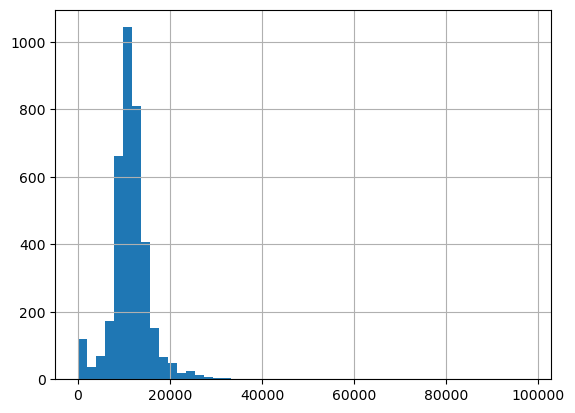

In [65]:
paris_df.prix_m2.hist(bins=50)

In [66]:
paris_df[paris_df.prix_m2 > 50000]

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_terrains_nature,prix_m2,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum,mois_transaction,jour_transaction,annee_transaction
6048796,10057507,2022-02-25,9200000.0,75,106,PARIS 06,75006,5 QUAI MALAQUAIS,Appartement,False,...,{},97872.340426,0,0,0,0,0,2,25,2022


In [67]:
paris_df[paris_df.id_transaction == 10056535].to_dict()

{'id_transaction': {},
 'date_transaction': {},
 'prix': {},
 'departement': {},
 'id_ville': {},
 'ville': {},
 'code_postal': {},
 'adresse': {},
 'type_batiment': {},
 'vefa': {},
 'n_pieces': {},
 'surface_habitable': {},
 'id_parcelle_cadastre': {},
 'latitude': {},
 'longitude': {},
 'surface_dependances': {},
 'surface_locaux_industriels': {},
 'surface_terrains_agricoles': {},
 'surface_terrains_sols': {},
 'surface_terrains_nature': {},
 'prix_m2': {},
 'surface_dependances_sum': {},
 'surface_locaux_industriels_sum': {},
 'surface_terrains_agricoles_sum': {},
 'surface_terrains_sols_sum': {},
 'surface_terrains_nature_sum': {},
 'mois_transaction': {},
 'jour_transaction': {},
 'annee_transaction': {}}

In [68]:
#model_DTR = DecisionTreeRegressor(max_depth=2)
#model_DTR.fit(X_train, y_train)
#model_DTR.fit(X_test, y_test)

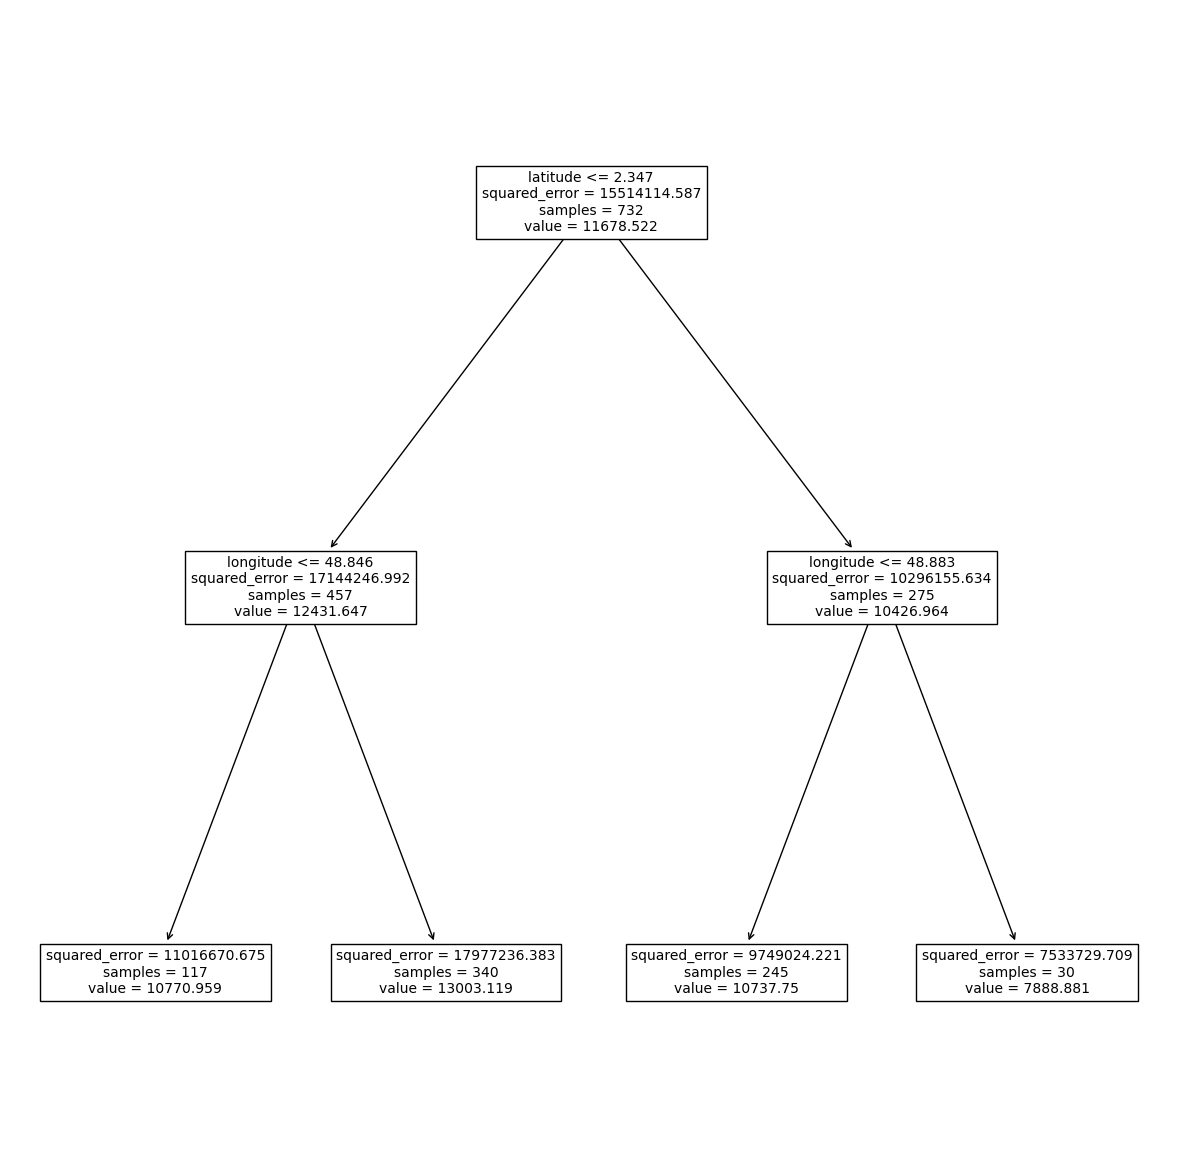

In [69]:
plt.figure(figsize=(15, 15))
plot_tree(model_DTR, feature_names=['latitude', 'longitude'], fontsize=10)
plt.show()

In [70]:
def plot_with_contour(model, X, y):
    
    # Visualisation des contours de décision
    x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=1, cmap='coolwarm')
    
    # Normalize the colormap to ignore extreme values
    # sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=0, vmax=20_2000,
    #                 marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=np.percentile(y, 5), vmax=np.percentile(y, 95), 
                     marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    
    plt.colorbar(sc, label='prix m2', orientation='vertical')
    
    
    plt.title("Contours de décision de l'arbre de décision")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [71]:
#model_KN = KNeighborsRegressor(n_neighbors=50)
#model_KN.fit(X_train, y_train)
#model_KN.fit(X_test, y_test)

In [72]:
#model_LR = LinearRegression()
#model_LR.fit(X_train, y_train)
#model_LR.fit(X_test, y_test)


In [73]:
#model_DTR = DecisionTreeRegressor(max_depth=4)
#model_DTR.fit(X_train, y_train)
#model_DTR.fit(X_test, y_test)

In [74]:
model_RFR= RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
model_RFR.fit(X_train, y_train)
#model_RFR.fit(X_test, y_test)

RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)

In [75]:
#plot_with_contour(model_KN, paris_df[['longitude', 'latitude']].values, paris_df['prix_m2'].values)
#plot_with_contour(model_KN, X_train,y_train)
#plot_with_contour(model_KN, X_test,y_test)

In [76]:
#np.sqrt(mean_squared_error(y_train, model_DTR.predict(X_train)))


In [77]:
#np.sqrt(mean_squared_error(y_test, model_DTR.predict(X_test)))

In [78]:
#np.sqrt(mean_squared_error(y_train, model_KN.predict(X_train)))


In [79]:
#np.sqrt(mean_squared_error(y_test, model_KN.predict(X_test)))

In [80]:
np.sqrt(mean_squared_error(y_train, model_RFR.predict(X_train)))


3447.521524757982

In [81]:
np.sqrt(mean_squared_error(y_test, model_RFR.predict(X_test)))

3333.3538988685227

In [82]:
from sklearn.model_selection import GridSearchCV

params_grid = {
 #               'LR': {
 #                   'model': LinearRegression(),
 #                   'params': {
  #                      'fit_intercept': [True, False],
  #                      'positive': [True, False]
  #                   }
#                 },
#                 'DTR': {
#                     'model': DecisionTreeRegressor(),
#                     'params': {
#                         'max_depth': list(range(1, 100)),
#                     }
#                 },
                'RFR': {
                    'model': RandomForestRegressor(),
                    'params': {
                        'max_depth': [1, 5, 10],
                        'min_samples_leaf': [6, 80, 100],  
                                       
                    }
                }
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'])
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Modèle: RFR avec params optimaux: {'max_depth': 5, 'min_samples_leaf': 6} donne erreur =
3396.8813582591597


In [83]:
import joblib
joblib.dump(model_RFR, "random_forest_model.pkl")

['random_forest_model.pkl']